# Mini-projet : classification de tumeurs à partir de données d'expression de gènes

Dans ce jeu de données, chaque observation est une tumeur, décrite par l'expression de 3 000 gènes. L'expression d'un gène est une mesure de la quantité d'ARN correspondant à ce gène qui est présente dans la cellule. Schématiquement, l'ADN est transcrit en ARN, lequel est lui-même traduit en une protéine. Les protéines assurent une multitude de fonctions du vivant, mais mesurer leur quantité est difficile ; d'où l'intérêt d'utiliser les quantités d'ARN, bien que la correspondance ne soit pas immédiate. 

Chaque tumeur de notre jeu de données est étiquetée selon qu'il s'agit d'une tumeur du sein ou d'une tumeur de l'ovaire. 

Le but de ce projet est de construire un classifieur binaire qui détermine, sur la base de l'expression de ces 3 000 gènes, **si une tumeur est une tumeur du sein ou de l'ovaire**.

## Instructions
1. Séparez les données en un jeu d'entraînement (90% des données) et un jeu de test.
2. Standardisez les données sur le jeu d'entraînement en utilisant `StandardScaler()` du [module preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. Utilisez une validation croisée pour sélectionner les meilleurs hyperparamètres d'au moins deux algorithmes d'apprentissage et comparer leurs performances. Attention à choisir une mesure de performance appropriée.
4. En conclure un modèle final et évaluer ses performances sur le jeu de test.

N'oubliez pas de commenter et interpréter vos résultats.

## Chargement des données

In [ ]:
import pandas as pd

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import importlib.util
import sys

bvo_df = pd.read_csv('small_Breast_Ovary.csv')

FileNotFoundError: ignored

The first column ("ID_REF") contains the sample ID, the last one ("Tissue") the "Breast" or "Ovary" label, and all others are gene expressions.

### Transformation des données en array numpy

In [ ]:
# design matrix
X = np.array(bvo_df.drop(columns=["ID_REF", "Tissue"]))  # Id, classification of cancer

In [ ]:
X.shape

(542, 3000)

We have 542 samples, each represented by 3000 gene expressions.

In [ ]:
n_features = X.shape[1]

In [ ]:
# target array
y = np.array(bvo_df["Tissue"])

# convert "Breast" in 0 and the other labels (here, "Ovarian") into 1
y = np.where(y=='Breast', 0, 1)

In [ ]:
y.shape

(542,)

#**Step 1 : Séparation les données aux ensembles de l'entrâinement et du test**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
test_size = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=41)
print('Les données sont divisées dont le rapport d\'ensemble du test =', test_size)
print()
print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("Y_train_shape:", Y_train.shape)
print("Y_test_shape:", Y_test.shape)


Les données sont divisées dont le rapport d'ensemble du test = 0.1

X_train_shape: (487, 3000)
X_test_shape: (55, 3000)
Y_train_shape: (487,)
Y_test_shape: (55,)


#**Step 2：Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
X_train = stdScale.fit_transform(X_train)
X_test = stdScale.fit_transform(X_test)

print(X_train)
print(X_test)

[[ 1.12116047 -0.89841177 -0.28110054 ... -0.98406232 -0.21711714
  -0.20517506]
 [ 1.2716684   1.62689488 -0.37301775 ... -0.52564646 -0.6132663
  -0.78242526]
 [ 0.18338028 -0.48099011 -0.47988801 ... -1.35832454 -0.18389172
   0.04871554]
 ...
 [-0.29672555  0.69950104  0.56770438 ... -1.21880667 -0.68994033
  -0.22667314]
 [-0.356784   -0.05664289 -0.21425165 ...  1.43978386  0.82053809
  -0.4974424 ]
 [-0.85715051  0.47284674  0.82454483 ...  0.9592223  -0.63371271
   0.13683992]]
[[-0.73478773 -1.29647474 -0.53641229 ...  0.26819689 -0.19051598
  -0.32545387]
 [ 0.22872821 -0.66314216 -0.17757363 ...  0.24378307 -0.27778622
  -0.3075757 ]
 [-0.05673486 -1.01895895  3.41376396 ...  1.52957749 -0.40075792
  -0.16680743]
 ...
 [-0.41871702 -0.08946749  2.1383522  ...  0.08509325 -0.52571303
  -0.0154073 ]
 [ 3.8223147  -0.39095297 -0.53287112 ...  0.12008639 -0.65463498
  -0.42042791]
 [-0.17541754 -0.26950652 -0.49745941 ...  0.30237624  0.67425275
  -0.49936505]]


#**Step 3 : Sélection des méthodes, puis validation croisée avec hyper-paramètres variés**

##**Step 3.1 : Comparaison des 4 algorithmes différentes**

*   Régression logistique ;
*   Gradient stochastique ;
*   Perceptron multi-couche ;
*   Arbre de décision.






In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty="l1", solver = "liblinear", C = 1, max_iter=1000)

sgdc = SGDClassifier()

mlp = MLPClassifier(hidden_layer_sizes=(20, ), activation='relu', solver='adam', 
                    alpha=1e-05, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=50, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=False, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

Dtree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, 
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.001, class_weight=None)

lr.fit(X_train, Y_train)
lr_y_predict = lr.predict(X_test)
lr_score = cross_val_score(lr,X_train,Y_train,cv=5)

sgdc.fit(X_train, Y_train)
sgdc_y_predict = sgdc.predict(X_test)
sgdc_score = cross_val_score(sgdc,X_train,Y_train,cv=5)

mlp.fit(X_train, Y_train)
mlp_y_predict = mlp.predict(X_test)
mlp_score = cross_val_score(mlp,X_train,Y_train,cv=5)

Dtree.fit(X_train, Y_train)
Dtree_y_predict = Dtree.predict(X_test)
Dtree_score = cross_val_score(Dtree,X_train,Y_train,cv=5)

print( 'Accuracy of LR Classifier:', lr_score.mean())
print(classification_report(Y_test, lr_y_predict, target_names=['Sein', 'Ovaire']))

print( 'Accuarcy of SGD Classifier:', sgdc_score.mean())
print(classification_report(Y_test, sgdc_y_predict, target_names=['Sein', 'Ovaire']))

print( 'Accuarcy of MLP Classifier:', mlp_score.mean())
print(classification_report(Y_test, mlp_y_predict, target_names=['Sein', 'Ovaire']))

print( 'Accuarcy of Dtree Classifier:', Dtree_score.mean())
print(classification_report(Y_test, Dtree_y_predict, target_names=['Sein', 'Ovaire']))


Accuracy of LR Classifier: 0.9589312013465181
              precision    recall  f1-score   support

        Sein       1.00      1.00      1.00        32
      Ovaire       1.00      1.00      1.00        23

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Accuarcy of SGD Classifier: 0.922028192720387
              precision    recall  f1-score   support

        Sein       0.97      1.00      0.98        32
      Ovaire       1.00      0.96      0.98        23

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55

Accuarcy of MLP Classifier: 0.940584893751315
              precision    recall  f1-score   support

        Sein       0.94      1.00      0.97        32
      Ovaire       1.00      0.91      0.95        23

    accuracy                           0.96 

Tous les 4 algorithms ont atteint une précision supérieure que 0.9.

#**Step 3.2 : Application du regréssion logistique, du MLP, et de l'arbre de décision**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_lr = [
  {
   'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
   'penalty': ["l1", "l2"]}
 ]

model_lr = GridSearchCV( LogisticRegression(penalty="l1", solver = "liblinear", C = 0.5, max_iter=50), 
                   param_grid_lr, cv=3, n_jobs=-1,verbose=2)  
model_lr.fit(X_train, Y_train)

print()
print("Best parameters set found on development set:")
print(model_lr.best_params_)
print()
# means = model_lr.cv_results_['mean_test_score']
# stds = model_lr.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, model_lr.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#            % (mean, std * 2, params))
# print()

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.6s finished



Best parameters set found on development set:
{'C': 5, 'penalty': 'l1'}



In [ ]:
model_lr_final = LogisticRegression(penalty=model_lr.best_params_['penalty'], solver = "liblinear", C = model_lr.best_params_['C'], max_iter=50)  
history_fit = model_lr_final.fit(X_train, Y_train)
score = cross_val_score(model_lr_final,X_train,Y_train,cv=5)
print('Accuracy of optimal LG =', score.mean())

Accuracy of optimal LG = 0.9609930570166212


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_mlp = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (5,5,)], 
   'learning_rate_init':[0.001, 0.01, 0.1],
   'alpha': [1e-7, 1e-5, 1e-3]}
 ]

model_mlp = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=20, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid_mlp, cv=3, n_jobs=-1,verbose=2)  

model_mlp.fit(X_train, Y_train)
print()
print("Best parameters set found on development set:")
print(model_mlp.best_params_)
print()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.1min finished



Best parameters set found on development set:
{'alpha': 1e-07, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}



In [ ]:
model_mlp_final = MLPClassifier(activation='tanh', alpha=model_mlp.best_params_['alpha'], batch_size=4, beta_1=0.9,
                          beta_2=0.999, early_stopping=True, epsilon=1e-08,
                          hidden_layer_sizes=model_mlp.best_params_['hidden_layer_sizes'], learning_rate='constant',
                          learning_rate_init=model_mlp.best_params_['learning_rate_init'], max_iter=500, momentum=0.8,
                          nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                          solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                          warm_start=False)

model_mlp_final.fit(X_train, Y_train)
score = cross_val_score(model_mlp_final,X_train,Y_train,cv=5)
print('Accuracy of optimal MLP =', score.mean())

Accuracy of optimal MLP = 0.9507258573532507


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = [
  {'max_depth': [5, 10, 15, 20], 
   'min_samples_split':[2, 3, 4, 5],
   'min_impurity_decrease': [1e-4, 0.001, 0.01, 0.1]}
]

model_dt = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=4, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None),
                   param_grid_dt, cv=3, n_jobs=-1,verbose=2) 

model_dt.fit(X_train, Y_train)
print()
print("Best parameters set found on development set:")
print(model_dt.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#            % (mean, std * 2, params))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:   45.2s finished



Best parameters set found on development set:
{'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_split': 5}


In [ ]:
model_dt_final = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=model_dt.best_params_['max_depth'], 
                                  min_samples_split=model_dt.best_params_['min_samples_split'], min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=model_dt.best_params_['min_impurity_decrease'], class_weight=None)
model_dt_final.fit(X_train, Y_train)
ore = cross_val_score(model_dt_final,X_train,Y_train,cv=5)
print('Accuracy of optimal decision tree =', score.mean())

Accuracy of optimal decision tree = 0.9507258573532507


#**Step 4 : Modèle final et évaluation**

On utilise LogisticRegression pour classifier le type de cancer.

In [ ]:
# Evaluate accuracy on test data
score = model_lr_final.score(X_test,Y_test)
print("Accuracy on test set = ", score)
y_true, y_pred = Y_test, model_lr_final.predict(X_test)
print(classification_report(y_true, y_pred, target_names=['Sein', 'Ovaire']))

Accuracy on test set =  1.0
              precision    recall  f1-score   support

        Sein       1.00      1.00      1.00        32
      Ovaire       1.00      1.00      1.00        23

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.13279737 0.03610504]
[399.21183381 108.53800286]


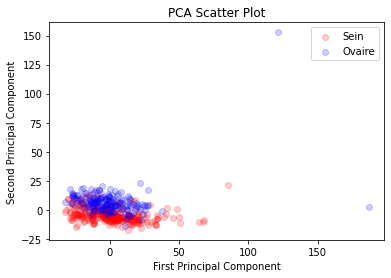

In [ ]:
colors = ['red', 'blue']
for i in range(2):
    x = X_reduced[:, 0][Y_train == i]
    y = X_reduced[:, 1][Y_train == i]
    plt.scatter(x, y, c=colors[i], alpha=0.2)

plt.legend(['Sein', 'Ovaire'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()